In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt
import string

from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
stemmer = nltk.SnowballStemmer("english")

Reading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_train='/content/drive/MyDrive/dreaddit-train.csv'
file_path_test='/content/drive/MyDrive/dreaddit-test.csv'

In [ ]:
train = pd.read_csv(file_path_train)
test=pd.read_csv(file_path_test)

In [ ]:
result = [train,test]
df= pd.concat(result)

df2 = df[['text']]
df3 = df[['text','label','confidence']]

df.shape

(3553, 116)

In [ ]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [ ]:
df.select_dtypes(include=['object']).apply(pd.Series.nunique, axis=0)

subreddit           10
post_id           2929
sentence_range     194
text              3532
dtype: int64

In [ ]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [ ]:
#there are no null values in the dataset.

#Data Cleaning

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df2


,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...
...,...
710,i have horrible vivid nightmares every night. ...
711,Also I can't think about both of them without ...
712,"Furthermore, I told him before we got really s..."
713,Here's the link to my amazon wish list where t...


In [ ]:
def removal(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove alphanumeric words
    text = re.sub('\w*\d\w*', '', text)

    # Remove stopwords
    text = [w for w in text.split(' ') if w not in stop_words]
    text = " ".join(text)

    return text



#Determining polarity and sentiment





In [ ]:
def polarity_calc(text):
  try:
        return TextBlob(text).sentiment.polarity
  except:
        return None

In [ ]:
df3['sentiment'] = df3['text'].apply(polarity_calc)

print(df3.head())

                                                text  label  confidence  \
0  He said he had not felt that way before, sugge...      1         0.8   
1  Hey there r/assistance, Not sure if this is th...      0         1.0   
2  My mom then hit me with the newspaper and it s...      1         0.8   
3  until i met my new boyfriend, he is amazing, h...      1         0.6   
4  October is Domestic Violence Awareness Month a...      1         0.8   

   sentiment  
0  -0.002742  
1   0.292857  
2   0.011894  
3   0.141671  
4  -0.204167  


<ipython-input-15-17ff2269498a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sentiment'] = df3['text'].apply(polarity_calc)


In [ ]:
df3.loc[:, 'text'] = df3['text'].apply(removal)
df3

<ipython-input-16-1439fb7aa646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'text'] = df3['text'].apply(removal)


,text,label,confidence,sentiment
0,"said felt way before, suggeted go rest ..trigg...",1,0.800000,-0.002742
1,"hey r/assistance, sure right place post this.....",0,1.000000,0.292857
2,"mom hit newspaper shocked would this, knows li...",1,0.800000,0.011894
3,"met new boyfriend, amazing, kind, sweet, good ...",1,0.600000,0.141671
4,october domestic violence awareness month dome...,1,0.800000,-0.204167
...,...,...,...,...
710,horrible vivid nightmares every night. sometim...,1,1.000000,-0.075000
711,also can't think without getting angry jealous...,1,0.571429,0.189286
712,"furthermore, told got really serious anxiety d...",1,0.600000,-0.044444
713,here's link amazon wish list two items are: l...,0,0.600000,0.090000


#Value Exploration


---



In [ ]:
print("Value Exploration :")
print("Minimum Sentiment :", df3["sentiment"].min())
print("Maximum Sentiment :", df3["sentiment"].max())
print()
print("Counts :")
print(df3.sentiment.value_counts())

Value Exploration :
Minimum Sentiment : -1.0
Maximum Sentiment : 1.0

Counts :
 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: sentiment, Length: 2627, dtype: int64


#Word Cloud

In [ ]:
negative_texts = df2[df3['sentiment'] < -0.15]['text']
positive_texts = df2[df3['sentiment'] > 0.15]['text']

print(negative_texts.head, '\n')
print(positive_texts.head,'\n')

<bound method NDFrame.head of 4      October is Domestic Violence Awareness Month a...
5      I think he doesn't want to put in the effort f...
8      I actually give an assistant half my emergency...
14     These past couple of months have been the wors...
27     November has been one of the worst months in a...
                             ...                        
677    I have a presentation to give on Wednesday as ...
690    aaaa sorry I feel so dumb for messing up like ...
691    All I have from them is a roof over a head and...
695    I remember thinking “What the hell is he doing...
699    The knowledge that a small part somewhere insi...
Name: text, Length: 477, dtype: object> 

<bound method NDFrame.head of 1      Hey there r/assistance, Not sure if this is th...
6      It was a big company so luckily I didn't have ...
13     No place in my city has shelter space for us, ...
15     I asked him three time what happened. And afte...
16     The sensation lasted hours. It seeme

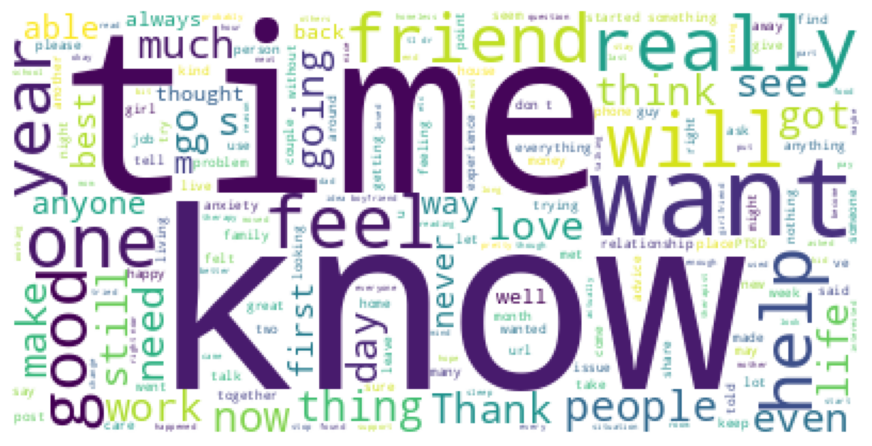

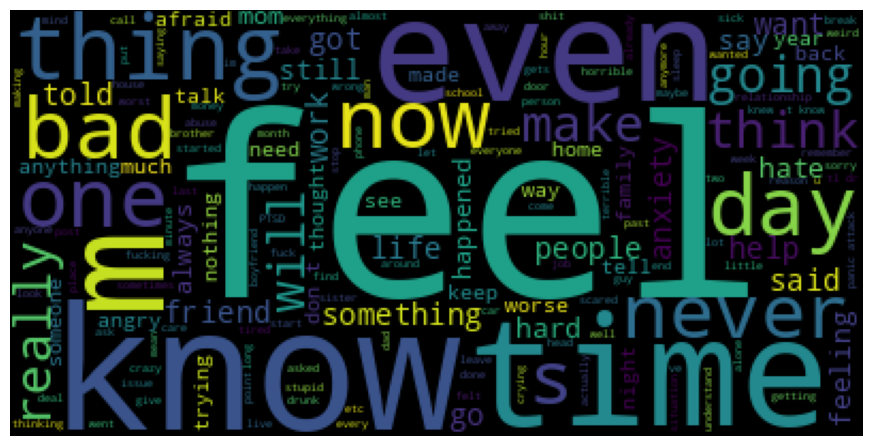

In [ ]:
def wc(data,bgcolor):
    plt.figure(figsize=(11,11))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

wc(positive_texts,'white')
wc(negative_texts,'black')


In [ ]:
#Adding meaning to text from og dataset
df3["meaning"] = df["label"].map({0:"Unstressed", 1:"Stressed"})
df3.head()

<ipython-input-20-3260c671fdae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["meaning"] = df["label"].map({0:"Unstressed", 1:"Stressed"})


,text,label,confidence,sentiment,meaning
0,"said felt way before, suggeted go rest ..trigg...",1,0.8,-0.002742,Stressed
1,"hey r/assistance, sure right place post this.....",0,1.0,0.292857,Unstressed
2,"mom hit newspaper shocked would this, knows li...",1,0.8,0.011894,Stressed
3,"met new boyfriend, amazing, kind, sweet, good ...",1,0.6,0.141671,Stressed
4,october domestic violence awareness month dome...,1,0.8,-0.204167,Stressed


#Count Plot

<Axes: xlabel='meaning', ylabel='count'>

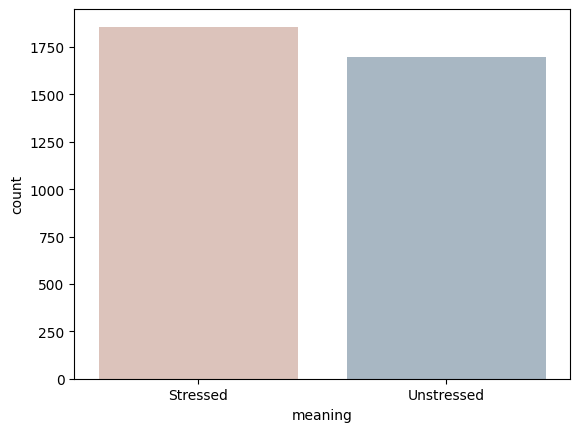

In [ ]:
sns.countplot(x='meaning',data = df3, palette= ["#e1c0b6", "#a3b8c8"])

#Data Modelling


In [ ]:
#Assign variables; x = features & y = target
high_confidence = df3[df3["confidence"]> 0.9]
high_confidence.shape

x = high_confidence.text
y = high_confidence.meaning

In [ ]:
vect=CountVectorizer(stop_words="english")
x=vect.fit_transform(x)

Data Splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
m1=mb.fit(x_train,y_train).predict(x_test)

print("Model Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Model Accuracy is 87.11%


#Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression().fit(x_train, y_train)
score = m2.score(x_test,y_test)
#accuracy_score(m2,y_test)
print("Model Accuracy is {p}%".format(p =round (score*100, 2)))

Model Accuracy is 87.11%


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
m3=d.predict(x_test)
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Model Accuracy is 69.91%


#Testing



In [ ]:
prompt = "The weather is pleasant"
p = vect.transform([prompt]).toarray()

#Decision Tree
print(d.predict(p))

#Logistic Regression
print(m2.predict(p))

#Using Naive Bayes
print(mb.predict(p))


['Stressed']
['Unstressed']
['Unstressed']


In [ ]:
prompt = "She won first place at the marathon"
p = vect.transform([prompt]).toarray()

#Decision Tree
print(d.predict(p))

#Logistic Regression
print(m2.predict(p))

#Using Naive Bayes
print(mb.predict(p))

['Stressed']
['Unstressed']
['Stressed']


In [ ]:
prompt = "Sometime I feel like I need some time"
p = vect.transform([prompt]).toarray()

#Decision Tree
print(d.predict(p))

#Logistic Regression
print(m2.predict(p))

#Using Naive Bayes
print(mb.predict(p))

['Stressed']
['Stressed']
['Stressed']


In [ ]:
prompt = "He felt underappreciated and resented his job"
p = vect.transform([prompt]).toarray()

#Decision Tree
print(d.predict(p))

#Logistic Regression
print(m2.predict(p))

#Using Naive Bayes
print(mb.predict(p))

['Stressed']
['Unstressed']
['Stressed']
